In [200]:
import collections
import functools
import itertools
import importlib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from matplotlib import ticker

from bullinger import chronogram
from bullinger import cohort
from bullinger import intervals
from bullinger import plot
from bullinger import video
from bullinger import analysis
import IPython.display

intervals = importlib.reload(intervals)
video = importlib.reload(video)
chronogram = importlib.reload(chronogram)
cohort = importlib.reload(cohort)
plot = importlib.reload(plot)
analysis = importlib.reload(analysis)

In [201]:
folder = '/home/oliviert/data/laura_codage/'
c = cohort.Cohort(folder, num_workers=20)

In [184]:
print(c.num_annotations, 'annotations in', len(c), 'videos')

3656 annotations in 197 videos


In [4]:
summary = c.summary
summary.duration /= 60
summary

video_id  baby   duration
semester group                           
1.0      AD           51    10  89.196900
         TD           49    10  76.348100
2.0      AD           49    10  83.218700
         TD           48    10  66.321783

# 2.3 Representation graphique

/home/olivier/dev/bullinger/venv/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/olivier/dev/bullinger/bullinger/chronogram.py:126: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.array(list(yticks.keys())), fontsize=18)


array(['parle', 'init', 'mama', 'rep', 'touch', 'sons', 'chant', 'obj',
       'voc'], dtype=object)

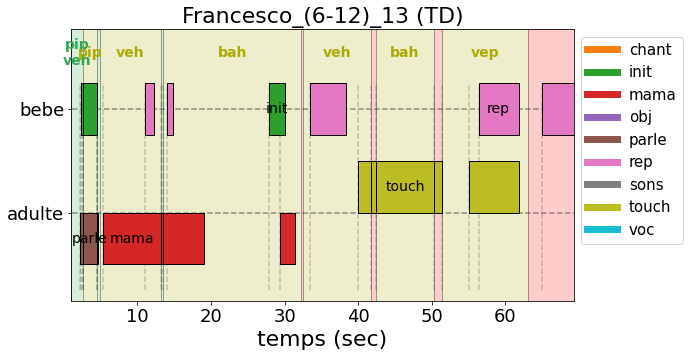

In [379]:
chronogram = importlib.reload(chronogram)
chronogram.plot(c[0], tags=c.interaction_tags)
c.actors_df.tag.unique()


# 3.1 Stimulations

## Taux de stimulation

relative           mean_duration          
                    mean       sem          mean       sem
semester group                                            
1.0      AD     0.445214  0.041393      8.745498  1.830404
         TD     0.528101  0.039871     12.188654  2.859145
2.0      AD     0.492116  0.048187     15.997383  4.293159
         TD     0.545194  0.043936     14.573623  2.850587

,semester,relative,mean_duration
0,2,0.418196,0.783807
1,1,0.152907,0.309063


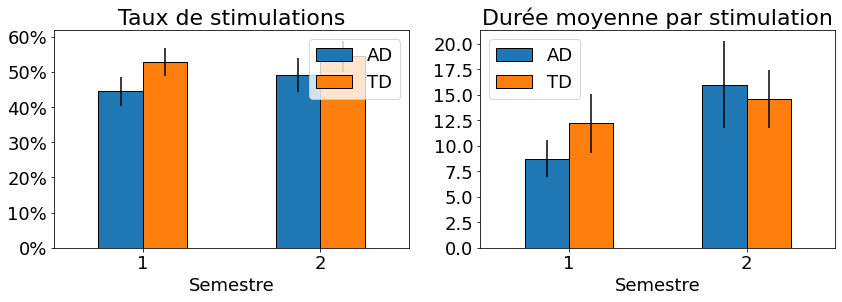

In [185]:
@analysis.to_series
def stimulation_rate(v: video.Video):
    stimul = intervals.from_dataframe(v.stimulations)
    if stimul.empty:
        return

    return {
        'relative': stimul.length / v.duration,
        'mean_duration':  np.mean([(i.upper - i.lower) for i in stimul]),
    }

def plot_stimulations(df):
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    for m, ax in zip(['relative', 'mean_duration'], axes):
        plot.plot_agg(df, metric=m, ax=ax, rot=0)
        ax.set_ylabel(None)
        ax.set_xlabel("Semestre", fontsize=18)
    axes[0].set_title('Taux de stimulations', fontsize=22)
    axes[1].set_title('Durée moyenne par stimulation', fontsize=22)
    
df = c.aggregate(stimulation_rate, fillnans=True)    
plot_stimulations(df)
IPython.display.display(df)
IPython.display.display(c.pvalues(stimulation_rate, fillnans=True))

## Types de stimuli

mama                 obj                sons            \
                    mean       sem      mean       sem      mean       sem   
semester group                                                               
1.0      AD     0.559435  0.054536  0.094253  0.035114  0.043671  0.013103   
         TD     0.487479  0.046818  0.071442  0.026735  0.046266  0.013637   
2.0      AD     0.313482  0.044933  0.151975  0.035761  0.092931  0.026818   
         TD     0.356948  0.047993  0.112392  0.030651  0.067932  0.015628   

                   parle               chant               touch            
                    mean       sem      mean       sem      mean       sem  
semester group                                                              
1.0      AD     0.098185  0.027173  0.035708  0.022163  0.090317  0.034598  
         TD     0.257889  0.041572  0.040479  0.016227  0.076037  0.024224  
2.0      AD     0.346603  0.051096  0.032678  0.013766  0.021515  0.010993  
         TD     0.299984  0.050206  0.048236  0.026171  0.093674  0.031360

,semester,mama,obj,sons,parle,chant,touch
0,2,0.509879,0.403582,0.425002,0.516876,0.597895,0.031040
1,1,0.320900,0.608475,0.891104,0.001629,0.863337,0.737841


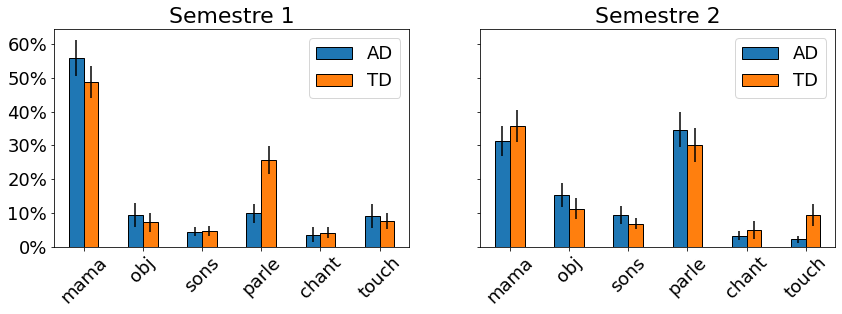

In [189]:
def tags(v: video.Video) -> pd.Series:
    df = v.visible
    df = df[(df.actor.str.startswith(v._adult)) & (df.tag != 'rep')]
    df = df.groupby('tag').agg({'duration': np.sum}) 
    df /= df.duration.sum()
    return df.transpose().iloc[0]


def plot_tags(df):
    fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)
    plot.per_semester(df, rot=45, axes=axes)
    for i, ax in enumerate(axes):
        ax.set_xlabel(None)
        ax.set_title(f"Semestre {i+1}", fontsize=22)
        

df = c.aggregate(tags, fillnans=True)
plot_tags(df)
IPython.display.display(df)
IPython.display.display(c.pvalues(tags, fillnans=True, anova=True))

# 3.2 Appuis proposés

## Nombre d'appuis

0.0                 2.0                 3.0            \
                    mean       sem      mean       sem      mean       sem   
semester group                                                               
1.0      AD     0.011763  0.004564  0.220924  0.043629  0.540505  0.062509   
         TD     0.020818  0.009116  0.189123  0.039942  0.615577  0.062056   
2.0      AD     0.098075  0.028392  0.178044  0.041907  0.220969  0.054927   
         TD     0.112424  0.032361  0.210111  0.052652  0.158966  0.045270   

                     1.0                 4.0                 5.0            
                    mean       sem      mean       sem      mean       sem  
semester group                                                              
1.0      AD     0.204205  0.048023  0.022602  0.019692  0.000000  0.000000  
         TD     0.165790  0.045571  0.006917  0.005462  0.001774  0.001774  
2.0      AD     0.495142  0.057042  0.007770  0.006225  0.000000  0.000000  
         TD     0.518500  0.058403  0.000000  0.000000  0.000000  0.000000

/home/oliviert/.local/lib/python3.8/site-packages/scipy/stats/stats.py:3641: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


,index,semester,0.0,2.0,3.0,1.0,4.0,5.0
0,1,1,0.370984,0.592858,0.396385,0.563641,0.452482,0.310043
1,0,2,0.739328,0.634042,0.386884,0.775376,0.219747,NaN


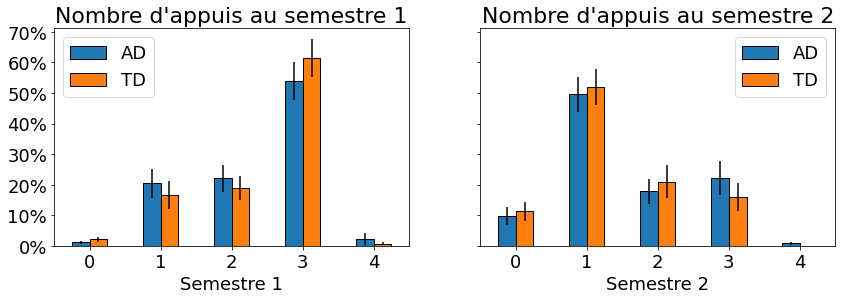

In [192]:
def plot_num_supports(df):
    _, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)
    axes = plot.per_semester(df.iloc[:, [0, 1, 6, 7, 2, 3, 4, 5, 8, 9]], axes=axes, rot=0)
    for i, ax in enumerate(axes):
        ax.set_title(f'Nombre d\'appuis au semestre {i+1}', fontsize=22)
        

df = c.aggregate(analysis.support_duration, fillnans=0.0)
plot_num_supports(df)
IPython.display.display(df)
IPython.display.display(c.pvalues(analysis.support_duration, fillnans=True))

## Nature des appuis

,semester,physique,sans,humain,mixte
0,1,0.604,0.395,0.282,0.169
1,2,0.023,0.832,0.003,0.126


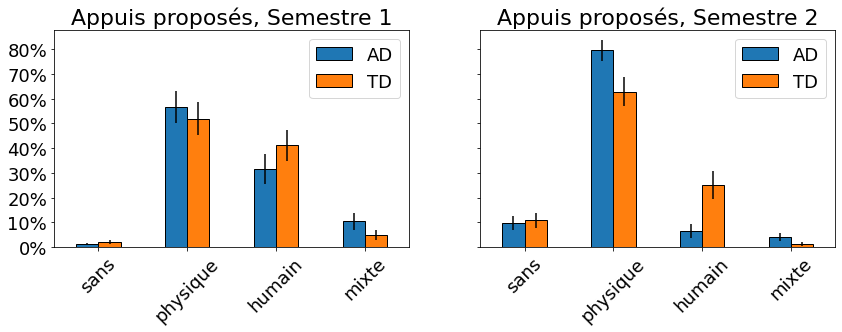

In [204]:
def extract_support_nature(s: str) -> str:
    ts = sorted(a[-1] for a in s.split(','))
    types = {'h': 'humain', 'v': 'invisible', 'p': 'physique', 's': 'sans'}
    if ts[0] == ts[-1]:
        if ts[0] not in types:
            print(ts)
        return types.get(ts[0], '?')
    return 'mixte'
    
    
def support_nature_rate(v: video.Video) -> pd.Series:
    df = v.context_df
    df = df[df.context != 'inv']
    df['type'] = df.context.apply(extract_support_nature)
    values =  df.groupby('type').agg({'duration': np.sum})
    values /= values.duration.sum()
    return values.transpose().iloc[0]


def plot_support_nature(df: pd.DataFrame):
    _, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)
    plot.per_semester(df.iloc[:, [2, 3, 0, 1, 4, 5, 6, 7]], rot=45, axes=axes)
    for i, ax in enumerate(axes):
        ax.set_title(f'Appuis proposés, Semestre {i+1}', fontsize=22)
        ax.set_xlabel(None)


df = c.aggregate(support_nature_rate, fillnans=True)
plot_support_nature(df)
with pd.option_context('display.float_format', '{:.3f}'.format):
    IPython.display.display(c.pvalues(support_nature_rate, fillnans=True))

# 4.1 les reponses du bébé

,semester,interaction
0,1,0.00088
1,2,0.00024


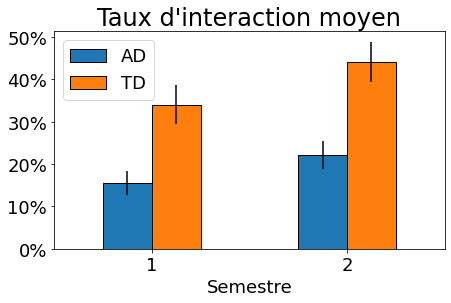

In [214]:
@analysis.to_series
def interaction_rate(v: video.Video) -> pd.Series:
    return {'interaction': v.responses.duration.sum() / v.duration}

def plot_interaction(df: pd.DataFrame):
    fig, ax = plt.subplots(1, 1, figsize=(7, 4))
    plot.plot_agg(df, ax=ax, metric='interaction', rot=0, title='Taux d\'interaction moyen')
    ax.set_xlabel('Semestre', fontsize=18)
    ax.set_ylabel(None)
    
df = c.aggregate(interaction_rate)
plot_interaction(df)
with pd.option_context('display.float_format', '{:.5f}'.format):
    IPython.display.display(c.pvalues(interaction_rate, fillnans=True))

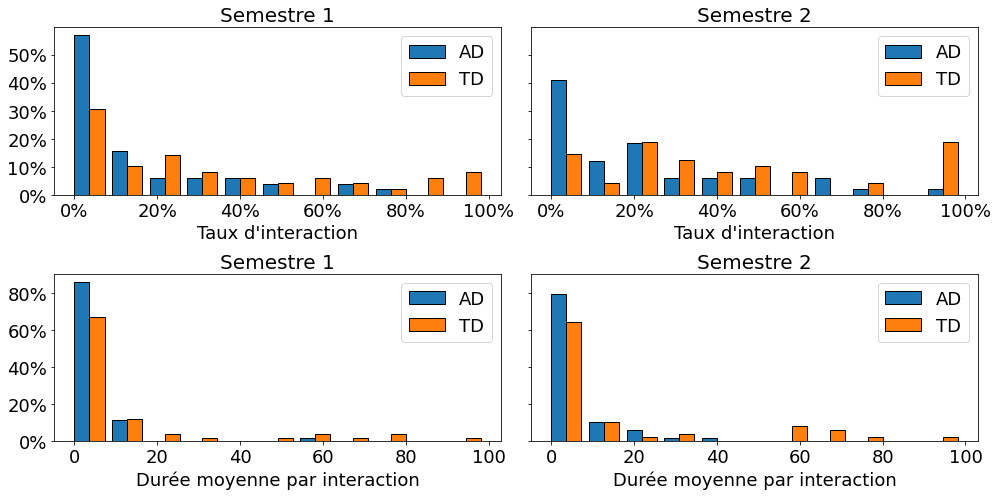

In [282]:
@analysis.to_series
def average_response_duration(v: video.Video, mean=False):
    """The baby starts, but is not answered back."""
    responses = intervals.from_dataframe(v.responses)
    if responses.empty:
        return 0.0
    
    durations = [r.upper - r.lower for r in responses]
    if mean:
        return np.mean(durations)
    else:
        return np.sum(durations) / v.duration


def plot_response_histogram(df, axes, max_value=1.0):
    groups = ['AD', 'TD']
    semesters = [1, 2]
    for ax, s in zip(axes, semesters):
        pos = np.linspace(0, max_value, 12)
        for i, group in enumerate(groups):
            v = df[(df.group == group) & (df.semester == s)].result
            counts, pos = np.histogram(v, bins=pos)
            counts = counts.astype(float) / (np.sum(counts) + 1e-9)
            w = np.diff(pos)*0.4
            ax.bar(pos[:-1] + i * w, counts, width=w, ec='k', align='edge', label=group)

        plot.readable_ax(ax)
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
        ax.set_title(f'Semestre {int(s)}', fontsize=20)
        if max_value <= 1.0:
            ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
            ax.set_xlabel('Taux d\'interaction', fontsize=18)
        else:
            ax.set_xlabel('Durée moyenne par interaction', fontsize=18)
            
    
def plot_histograms():
    fig, axes = plt.subplots(2, 2, figsize=(14, 7), sharey='row')
    df = c.apply(functools.partial(average_response_duration, mean=False))
    plot_response_histogram(df, axes[0], max_value=1.0)
    
    df = c.apply(functools.partial(average_response_duration, mean=True))
    plot_response_histogram(df, axes[1], max_value=100.0)
    plt.tight_layout()

plot_histograms()

# average_response_duration(c[0], mean=True)

,semester,result
0,1,0.19027
1,2,0.02613


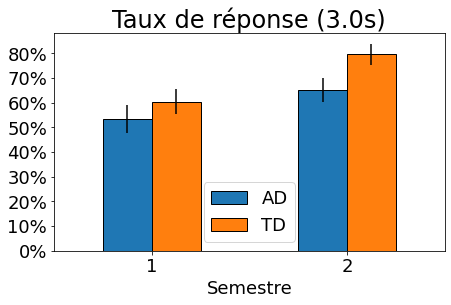

In [284]:
tol = 3.0

def plot_response_rate(df):
    fig, ax = plt.subplots(1, 1, figsize=(7, 4))
    plot.plot_agg(agg_df, 'result', ax=ax, rot=0, title=f'Taux de réponse ({tol}s)')
    ax.set_ylabel(None)
    ax.set_xlabel("Semestre", fontsize=18)
    
response_fn = functools.partial(analysis.response_rate, tolerance=tol)
agg_df = c.aggregate(response_fn)
plot_response_rate(df)
with pd.option_context('display.float_format', '{:.5f}'.format):
    IPython.display.display(c.pvalues(response_fn, fillnans=True))

# A cleaner

NameError: name 'tol' is not defined

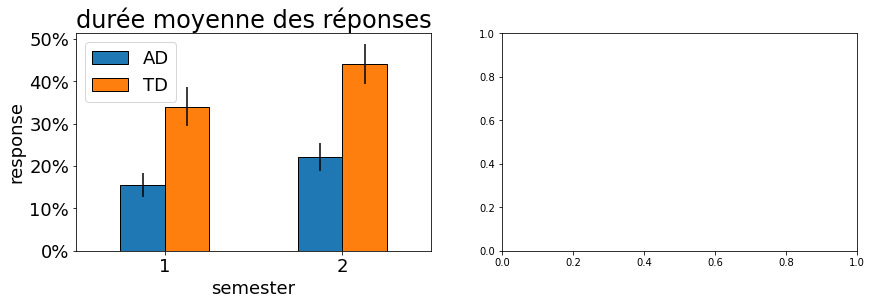

In [195]:

agg_df = c.aggregate(functools.partial(analysis.response_rate, tolerance=5))
plot.plot_agg(agg_df, 'result', ax=axes[1], rot=0, title=f'Stimuli répondus ({tol}s)')
for ax in axes:
    ax.set_ylabel(None)
    ax.set_xlabel("Semestre", fontsize=20)
plot.new_legend(axes)
plt.tight_layout()

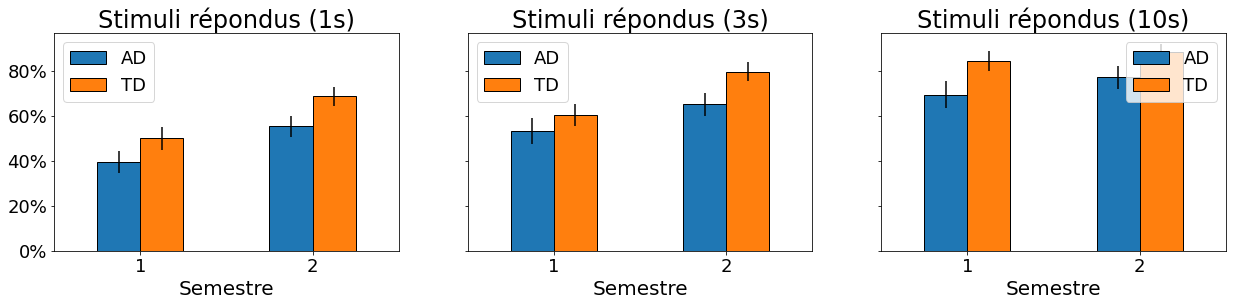

In [382]:
fig, axes = plt.subplots(1, 3, figsize=(21, 4), sharey=True)
for ax, tol in zip(axes, [1, 3, 10]):
    agg_df = c.aggregate(functools.partial(analysis.response_rate, tolerance=tol))
    plot.plot_agg(agg_df, 'result', ax=ax, rot=0, title=f'Stimuli répondus ({tol}s)')
    ax.set_ylabel(None)
    ax.set_xlabel("Semestre", fontsize=20)

# Le bébé est-il à l'initiative de l'interaction ?

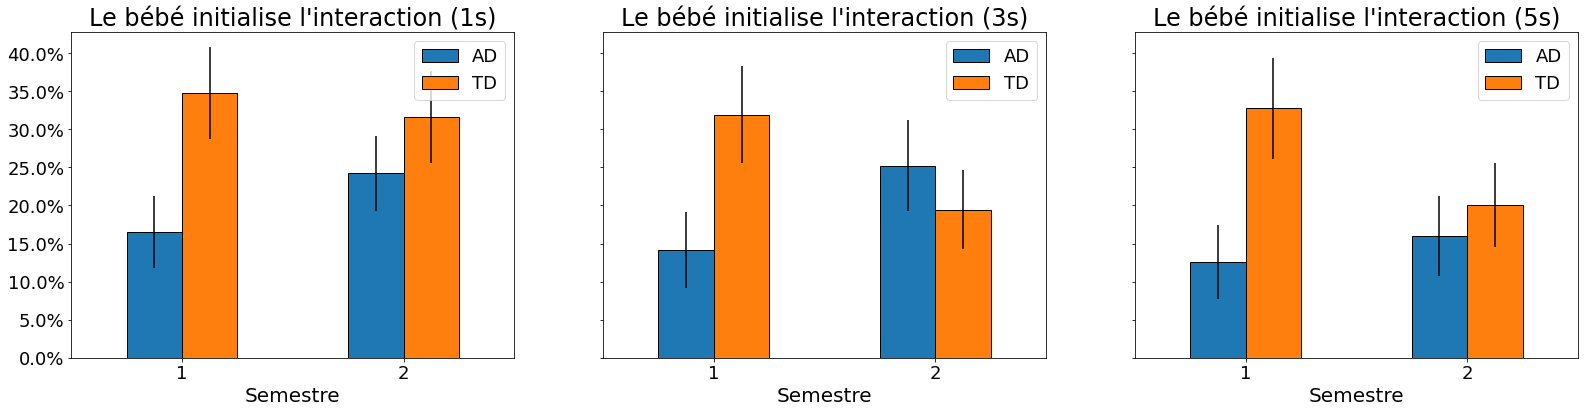

In [383]:
fig, axes = plt.subplots(1, 3, figsize=(3*9, 6), sharey=True)
for ax, tol in zip(axes, [1, 3, 5]):
    df = c.aggregate(functools.partial(analysis.starts, tolerance=tol), fillnans=None)
    plot.plot_agg(df, 'result', ax=ax, rot=0, title=f'Le bébé initialise l\'interaction ({tol}s)')
    ax.set_ylabel(None)
    ax.set_xlabel("Semestre", fontsize=20)

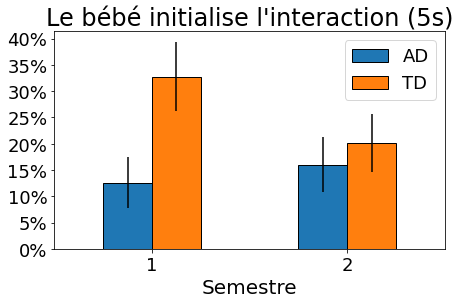

In [565]:
df = c.aggregate(functools.partial(analysis.starts, tolerance=5), fillnans=None)
fig = plt.figure(figsize=(7, 4))
ax = plt.gca()
plot.plot_agg(df, 'result', ax=ax, rot=0, title=f'Le bébé initialise l\'interaction ({5}s)')
ax.set_ylabel(None)
ax.set_xlabel("Semestre", fontsize=20)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))

# Durée des reponses

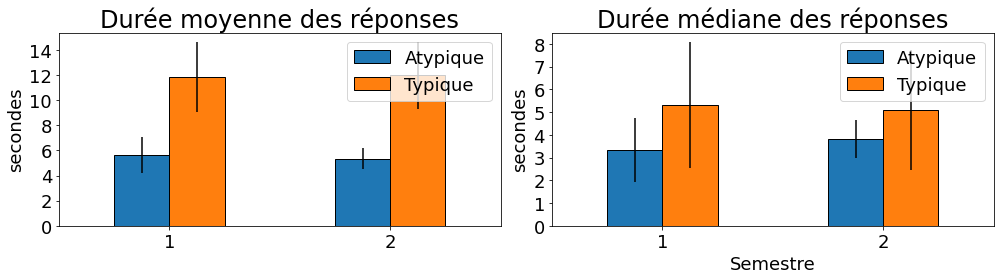

In [194]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
for ax, median, name in zip(axes, [False, True], ['moyenne', 'médiane']):
    df = c.aggregate(analysis.average_response_duration, median=median)
    plot.plot_agg(df, 'result', ax=ax, rot=0, title=f'Durée {name} des réponses')
    ax.set_ylabel('secondes')
    ax.set_xlabel(None if name == 'moyenne' else 'Semestre', fontsize=18)
plt.tight_layout()
plot.new_legend(axes)

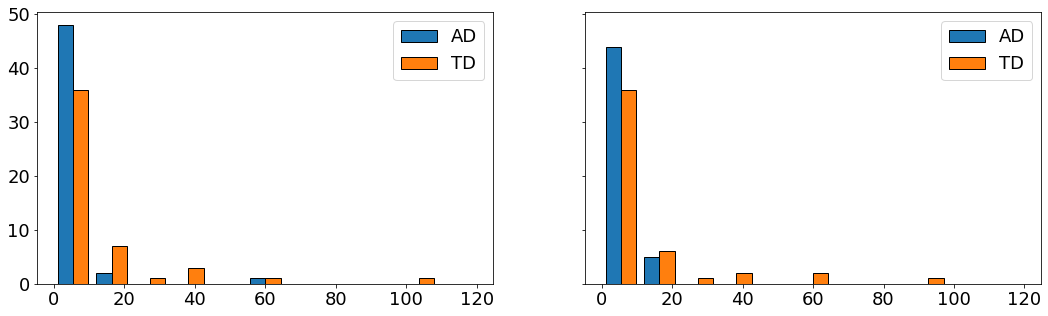

In [216]:
@to_series
def average_response_duration(v: video.Video):
    """The baby starts, but is not answered back."""
    return v.responses.duration.mean()

df = c.apply(analysis.average_response_duration)

groups = ['AD', 'TD']
semesters = [1, 2]
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)
for ax, s in zip(axes, semesters):
    pos = np.linspace(0, 120, 12)
    values = [df[(df.group == group) & (df.semester == s)].result
              for group in groups]
    _ = ax.hist(values, bins=pos, ec='k', label=groups)
    plot.readable_ax(ax)

# Le nombre d'appuis influencent-ils la reponse du bébé ?

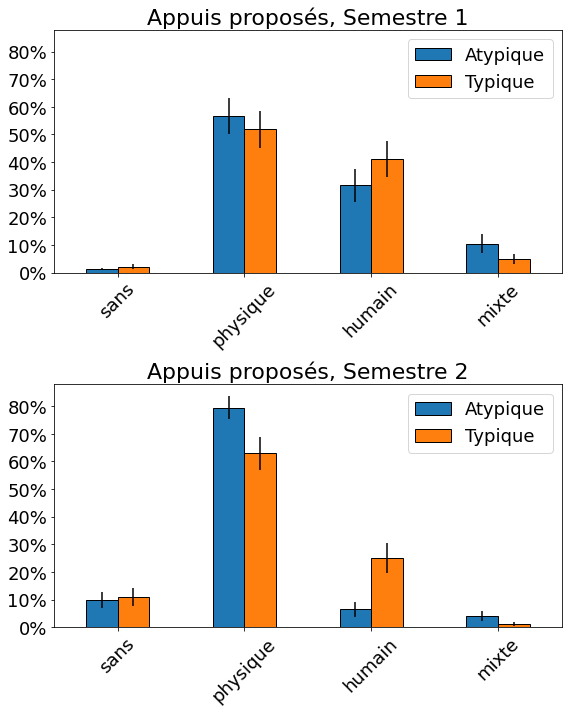

In [269]:
v = c[15]
df = v.df.copy()
df['support_type'] = v.df.context.apply(lambda x: ','.join(sorted(a[-1] for a in x.split(','))))

def get_simple_type(s):
    ts = sorted(a[-1] for a in s.split(','))
    types = {'h': 'humain', 'v': 'invisible', 'p': 'physique', 's': 'sans'}
    if ts[0] == ts[-1]:
        if ts[0] not in types:
            print(ts)
        return types.get(ts[0], '?')
    return 'mixte'
    

def simple_type(v):
    df = v.context_df
    df = df[df.context != 'inv']
    df['type'] = df.context.apply(get_simple_type)
    values =  df.groupby('type').agg({'duration': np.sum})
    values /= values.duration.sum()
    return values.transpose().iloc[0]

df = c.aggregate(simple_type, fillnans=0.0)
_, axes = plt.subplots(2, 1, figsize=(8, 10), sharey=True)
plot.per_semester(df.iloc[:, [2, 3, 0, 1, 4, 5, 6, 7]], rot=45, axes=axes)
for i, ax in enumerate(axes):
    ax.set_title(f'Appuis proposés, Semestre {i+1}', fontsize=22)
    ax.set_xlabel(None)
plt.tight_layout()
plot.new_legend(axes)

In [265]:
# def support_type_response_fn(v, num_supports=3):
#     v.df['support_type'] = v.df.context.apply(lambda x: ','.join(sorted(a[-1] for a in x.split(','))))
#     df = pd.pivot_table(v.responses_per(groupby='support_type'), 'relative', index='support_type')
#     df = df.transpose()
    
#     def cond_fn(col):
#         if num_supports == 0:
#             return col == 's'
#         if num_supports == 1:
#             return len(col) == 1 and col != 's'
#         return (num_supports == col.count(',') + 1) and (col.split(',')[0] == col.split(',')[-1])
   
#     df = df.drop(columns=list(filter(lambda col: not cond_fn(col), df.columns)))
#     if df.shape[0]:
#         return df.iloc[0]

# fig, axes = plt.subplots(3, 2, figsize=(2*7, 3*7), sharey='row')
# for row, num in zip(axes, range(1, 4)):
#     df = c.aggregate(functools.partial(support_type_response_fn, num_supports=num)).dropna(axis=1)
#     plot.per_semester(df, axes=row, rot=0)
#     for i, ax in enumerate(row):
#         ax.set_xticklabels(['Humain', 'Physique'])
#         ax.set_xlabel(None)
#         ax.set_title(f'Taux de réponse {num} appui{"s"*(num>1)}, semestre {i+1}', fontsize=24)
# plt.tight_layout()

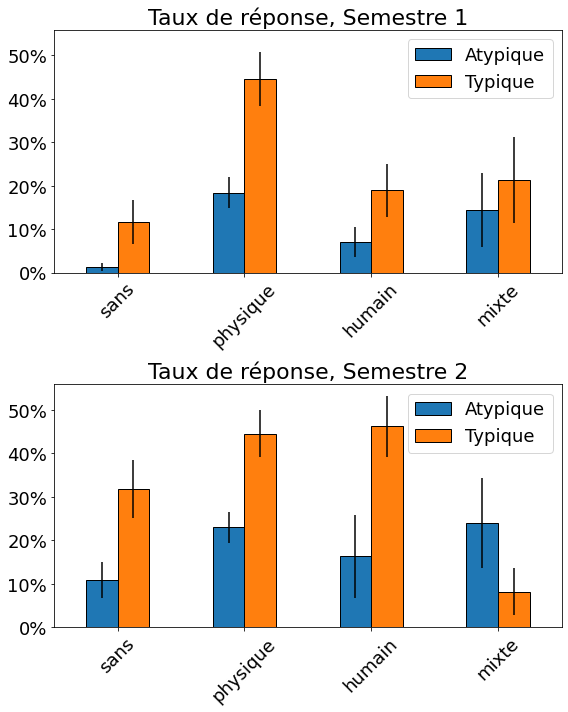

In [270]:
def get_simple_type(s):
    ts = sorted(a[-1] for a in s.split(','))
    types = {'h': 'humain', 'v': 'invisible', 'p': 'physique', 's': 'sans'}
    if ts[0] == ts[-1]:
        return types.get(ts[0], '?')
    return 'mixte'
    

def response_per_type(v):
    df = v.df
    df['type'] = df.context.apply(get_simple_type)
    df = v.responses_per(groupby='type')
    df = pd.pivot_table(df, 'relative', index='type')
    df = df.transpose()
    if df.shape[0]:
        return df.iloc[0]

df = c.aggregate(response_per_type, fillnans=None)
_, axes = plt.subplots(2, 1, figsize=(8, 10), sharey=True)
plot.per_semester(df.iloc[:, [2, 3, 0, 1, 4, 5, 6, 7]], rot=45, axes=axes)
for i, ax in enumerate(axes):
    ax.set_title(f'Taux de réponse, Semestre {i+1}', fontsize=22)
    ax.set_xlabel(None)
plt.tight_layout()
plot.new_legend(axes)

# Support et initialisation

In [74]:
init_vids = [v.vid for v in c if (v.semester == 1 and analysis.starts(v).result > 0.0)]
len(init_vids)

28

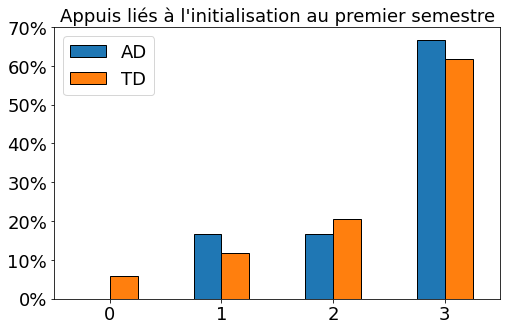

In [165]:
def start_supports(v: video.Video, tolerance=5.0):
    resp = intervals.from_dataframe(v.responses)
    stim = intervals.from_dataframe(v.stimulations)
    seqs = v.sequences(tolerance)
    count, total = 0, 0
    supports = collections.defaultdict(int)
    df = v.df
    for seq in seqs:
        curr_stim = stim.intersection(seq)
        curr_resp = resp.intersection(seq)
        if curr_stim.empty or curr_resp.empty:
            continue

        if curr_stim.lower > curr_resp.lower:
            supports[df[(df.start >= curr_stim.lower)].num_supports.iloc[0]] += 1
    result = pd.Series(
        {int(k): v / sum(supports.values()) for (k, v) in supports.items()},
        dtype=float)
    return pd.DataFrame(pd.concat([v.constants, result])).transpose()
    

def start_supports_agg(c, init_vids, tolerance: int = 3):
    df = pd.concat([start_supports(c[vid]) for vid in init_vids],
                   axis=0)
    df = df.reset_index().drop(columns=('index')).fillna(0.0)
    df = df.groupby('group').agg({k: sum for k in range(4)})
    df = df.transpose()
    for i in range(2):
        df.iloc[:, i] /= sum(df.iloc[:, i])

    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    df.plot.bar(rot=0, ec='k', ax=ax)
    plot.readable_ax(ax)
    ax.set_xlabel(None)
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax.set_title('Appuis liés à l\'initialisation au premier semestre', fontsize=18)
    

start_supports_agg(c, init_vids, tolerance=5.0)

# Les bebes AD sont-ils moins filmes ?

<AxesSubplot:title={'center':'Le bébé est hors champ'}, xlabel='semester', ylabel='invisible'>

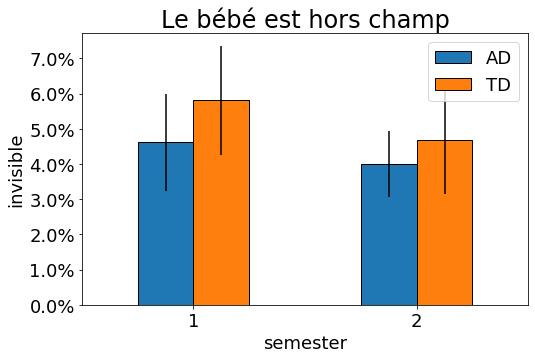

In [132]:
plot.plot_agg(c.aggregate(analysis.invisible_time, fillnans=0.0), 'invisible', rot=0, title='Le bébé est hors champ')

4 sequences d'interaction


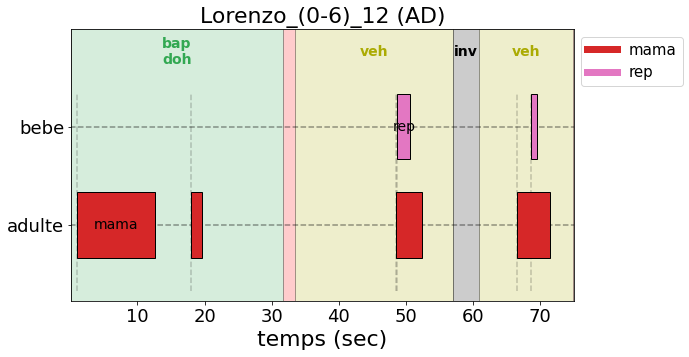

In [1023]:
chronogram.plot(c[9])
print(len(c[9].sequences(tolerance=5)), 'sequences d\'interaction')

# Repeated movements

In [413]:
print(c.df[c.df.actor.str.startswith('rme')].video_id.unique().size, 'videos avec RME')

28 videos avec RME


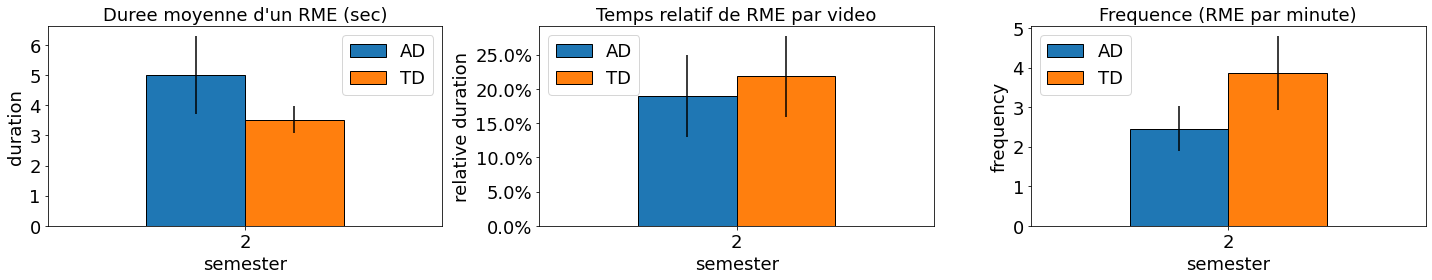

In [414]:
def repeated_duration(v: video.Video):
    df = v.df
    df = df[df.actor.str.startswith('rme')]
    exists = df.duration.sum() > 0
    return pd.Series({
        'duration': df.duration.mean(),
        'relative duration': df.duration.sum() / v.duration if exists else np.nan,
        'frequency': df.duration.count() / v.duration * 60 if exists else np.nan,
    })

df = c.aggregate(repeated_duration)
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
plot.plot_agg(df, 'duration', rot=0, ax=axes[0])
plot.plot_agg(df, 'relative duration', rot=0, ax=axes[1])
plot.plot_agg(df, 'frequency', rot=0, ax=axes[2], percentage=False)
axes[0].set_title('Duree moyenne d\'un RME (sec)', fontsize=18)
axes[1].set_title('Temps relatif de RME par video', fontsize=18)
axes[2].set_title('Frequence (RME par minute)', fontsize=18)
plt.tight_layout()

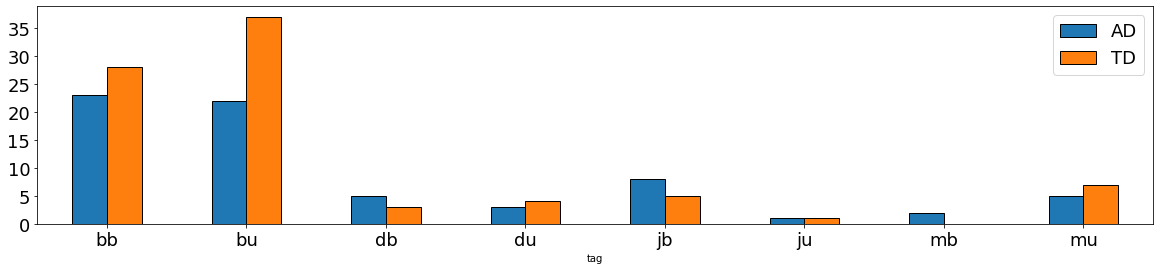

In [415]:
df = c.df[c.df.actor.str.startswith('rme')]
_, ax = plt.subplots(1, 1, figsize=(20, 4))
pd.pivot_table(df, 'duration', index='tag', columns=['group'], aggfunc='count').plot.bar(ec='k', ax=ax)
plot.readable_ax(ax)

<AxesSubplot:title={'center':'Claudio_(6-12)_09'}, xlabel='temps (sec)'>

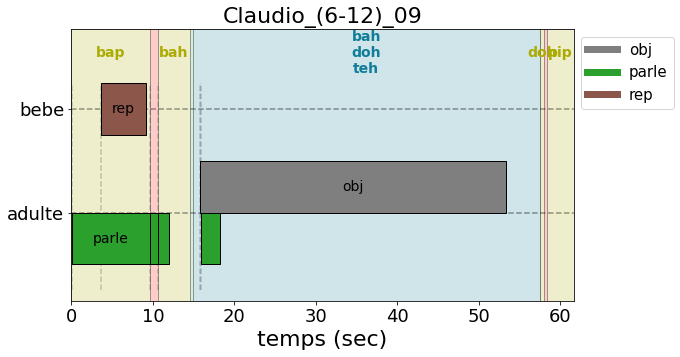

In [423]:
c.df[c.df.tag == 'db'].video_id.unique()
chronogram.plot(c['Claudio_(6-12)_09'])

In [402]:
def rme_breakdown(v):
    df = v.df
    return pd.pivot_table(df, 'duration', index='group', columns=['tag'], aggfunc=np.sum)

df = pd.concat([rme_breakdown(v) for v in c]).reset_index()
df.groupby('group').agg(['mean', 'sem'])

init                 mama                parle            \
           mean       sem       mean       sem       mean       sem   
group                                                                 
AD     5.889357  1.038983  29.422803  2.586733  21.938517  4.030469   
TD     6.210261  1.875960  26.046062  2.745201  19.203672  2.361504   

             rep              support            ...        db            \
            mean       sem       mean       sem  ...      mean       sem   
group                                            ...                       
AD     21.458608  2.416541  97.677949  2.907724  ...  11.06075  4.341101   
TD     33.461800  3.491652  84.560887  2.804284  ...       NaN       NaN   

           mb              du                 mu              voc      
         mean     sem    mean     sem       mean       sem   mean sem  
group                                                                  
AD     14.897  13.156  9.1685  4.3315  10.469667  3.751894  1.383 NaN  
TD        NaN     NaN     NaN     NaN        NaN       NaN    NaN NaN  

[2 rows x 40 columns]

# Etats d'eveil

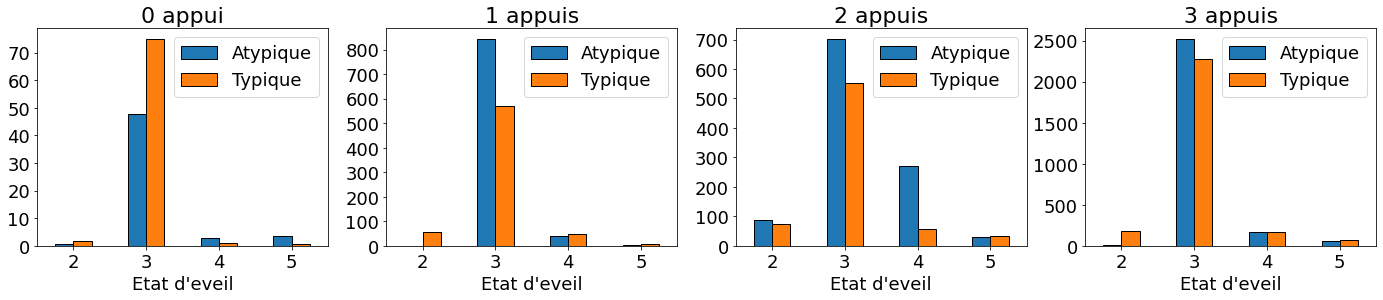

In [272]:
vid = c.df[c.df.actor == 'bebe bis'].video_id.unique().tolist()[4]
df = c[vid].df
df = c.df
df = df[df.actor == 'bebe bis']
df = df.groupby(['num_supports', 'tag', 'group']).agg({'duration': np.sum}).iloc[:-4, :]
supports = df.index.get_level_values('num_supports').unique()
fig, axes = plt.subplots(1, supports.shape[0], figsize=(6*supports.shape[0], 4))
for support, ax in zip(supports, axes):
    table = pd.pivot_table(df.loc[support], values='duration', index='tag', columns=['group'])
    table.plot.bar(rot=0, ec='k', ax=ax)
    ax.set_xlabel('Etat d\'eveil', fontsize=18)
    ax.set_title(f'{int(support)} appui' + 's' * bool(support), fontsize=22)
    plot.readable_ax(ax)
plot.new_legend(axes)

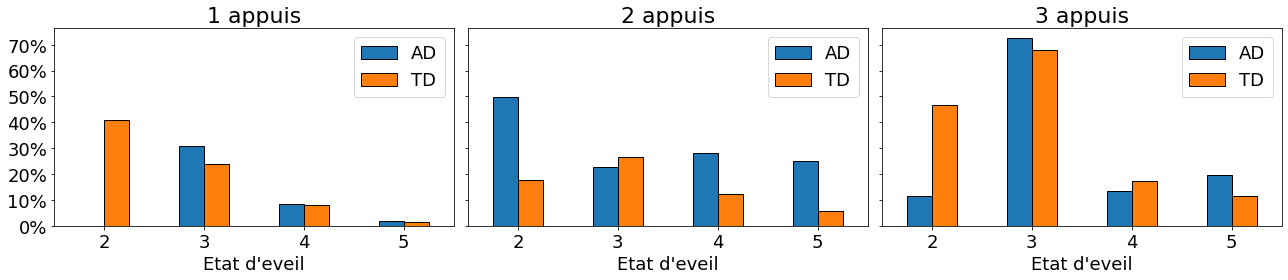

In [1353]:
def awake(v: video.Video) -> pd.Series:
    df = v.df
    df = df[df.actor == 'bebe bis']
    df = df.groupby(['num_supports', 'tag', 'group']).agg({'duration': np.sum})
    df.duration /= df.duration.sum()
    return df.reset_index()
    
df = pd.concat([awake(v) for v in c])
df = df.groupby(['num_supports', 'tag', 'group']).agg({'duration': ['mean', 'sem']}).iloc[8:-4]
supports = df.index.get_level_values('num_supports').unique()

# dd = pd.pivot_table(df.loc[2.0], values='duration', index='tag', columns=['group'])

fig, axes = plt.subplots(1, supports.shape[0], figsize=(6*supports.shape[0], 4), sharey=True)
for support, ax in zip(supports, axes):
    table = pd.pivot_table(df.loc[support], values='duration', index='tag', columns=['group'])
    table.loc[:, 'mean'].plot.bar(rot=0, ec='k', ax=ax)
    ax.set_xlabel('Etat d\'eveil', fontsize=18)
    ax.set_title(f'{int(support)} appui' + 's' * bool(support), fontsize=22)
    plot.readable_ax(ax)    
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
plt.tight_layout()

In [274]:
def awake(v: video.Video) -> pd.Series:
    df = v.df
    df = df[(df.actor == 'bebe bis') & (df.duration > 0.1) & (df.num_supports < 5)]
    df.num_supports = df.num_supports.astype(int)
    df.tag = df.tag.astype(int)
    df = df.groupby(['num_supports', 'tag']).agg({'duration': np.sum})
    df.duration /= df.duration.sum()
    df = pd.pivot_table(df, values='duration', index='num_supports', columns=['tag']).fillna(0.0)
    result = np.zeros((5, 6))
    result[np.ix_(df.index, df.columns)] = df
    return result

m_ad = np.stack([awake(v) for v in c if v.group == 'AD' and v.semester == 1])
m_td = np.stack([awake(v) for v in c if v.group == 'TD' and v.semester == 1])

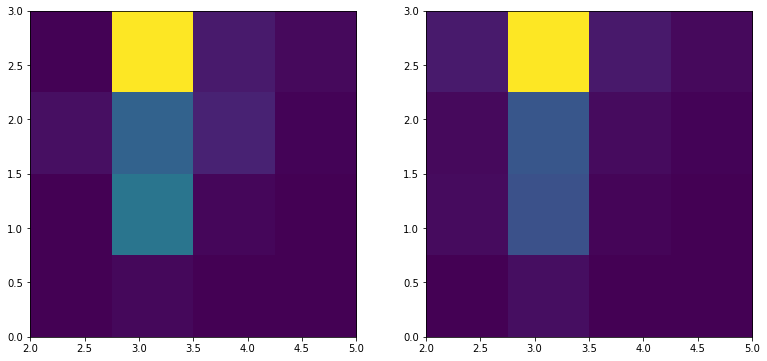

In [275]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6))
for m, ax in zip((m_ad, m_td), axes):
    ax.imshow(np.mean(m, axis=0)[:-1,2:], origin='lower', extent=[2,5,0,3])

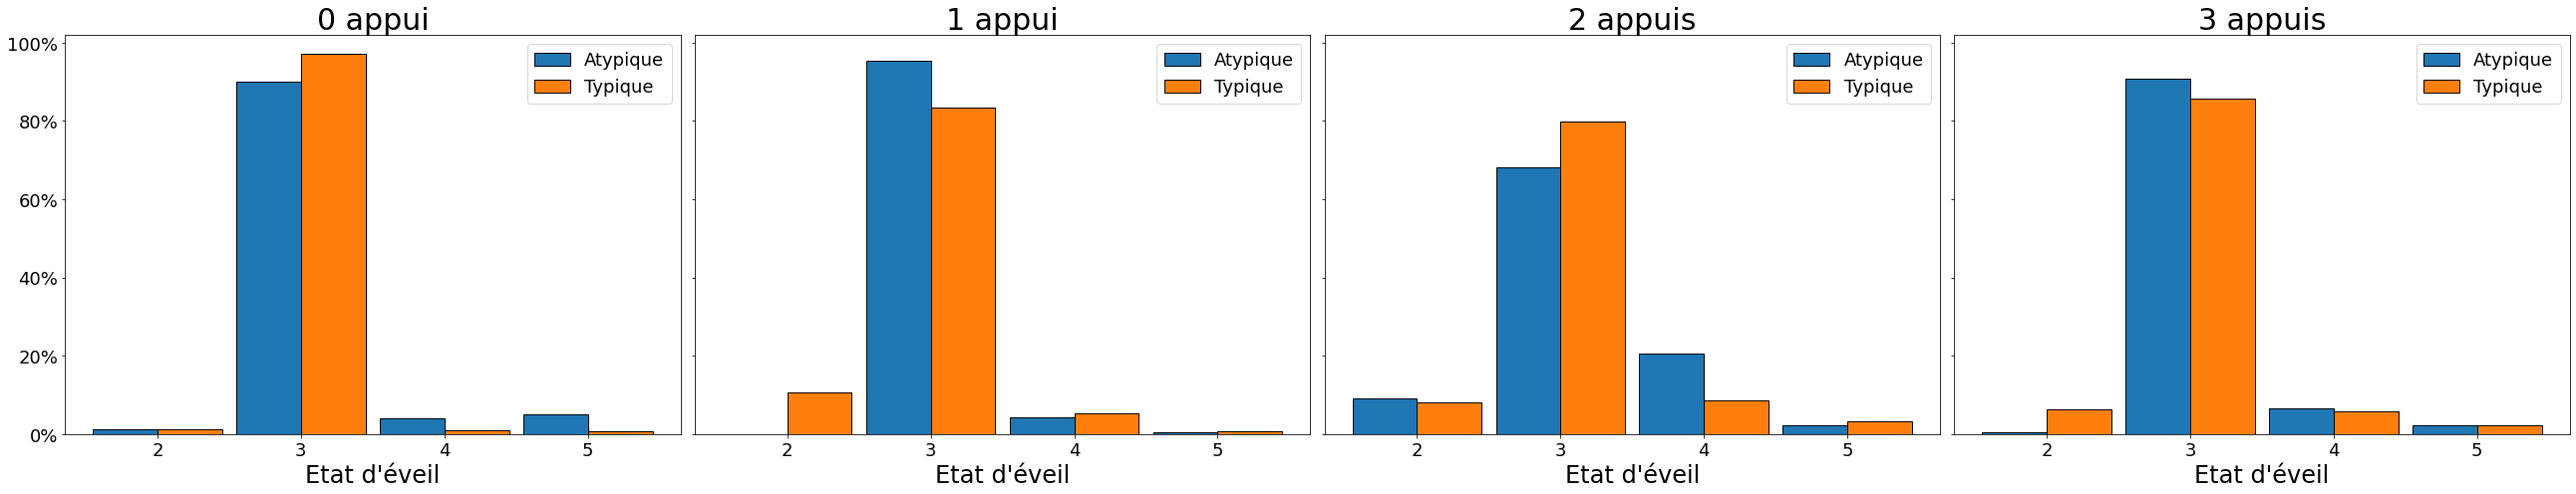

In [277]:
def plot_awake(c, not3=False):
    m_ad = np.stack([awake(v) for v in c if v.group == 'AD' and v.semester == 1])
    m_td = np.stack([awake(v) for v in c if v.group == 'TD' and v.semester == 1])
    
    fig, axes = plt.subplots(1, 4, figsize=(9*4, 7), sharey=True)
    for i, m in enumerate((m_ad, m_td)):
        group = 'TD' if i else 'AD'
        mu = np.mean(m, axis=0)[:-1,2:]
        mu /= np.sum(mu, axis=1)[:, np.newaxis]
        if not3:
            mu = mu[:, [0, 2, 3]]
        for j in range(4):
            ax = axes[j]
            states = np.arange(2, 6) if not not3 else np.array([2, 4, 5])
            ax.bar(states + 0.45*i, mu[j], width=0.45, ec='k', label=group)
            ax.set_title(f'{j} appui' + 's' * bool(j>1), fontsize=30)
            ax.set_xticks(states+0.225)
            ax.set_xticklabels(states)
    for ax in axes:
        ax.legend(fontsize=22)
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
        ax.set_xlabel('Etat d\'éveil', fontsize=24)
        plot.readable_ax(ax)
    plt.tight_layout()
    plot.new_legend(axes)
    
plot_awake(c, not3=False)
# plot_awake(c, not3=True)

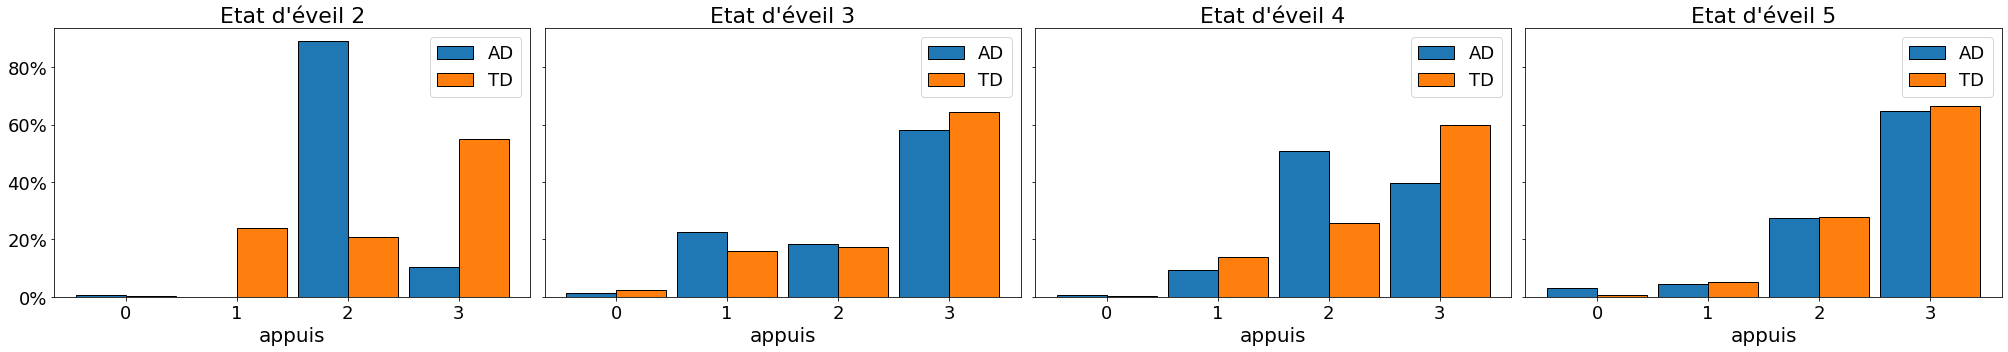

In [1566]:
import scipy
fig, axes = plt.subplots(1, 4, figsize=(7*4, 5), sharey=True)
for i, m in enumerate((m_ad, m_td)):
    group = 'TD' if i else 'AD'
    mu = np.mean(m, axis=0)[:-1,2:]
#     sem = scipy.stats.sem(m[:-1,2:], axis=0)
    cum = np.sum(mu, axis=0)[np.newaxis, :]
    mu /= cum
#     sem /= cum
    for j in range(4):
        ax = axes[j]
        states = np.arange(0, 4)
        ax.bar(states + 0.45*i, mu[:, j], width=0.45, ec='k', label=group)
        ax.set_title(f'Etat d\'éveil {j+2}', fontsize=22)
        ax.set_xticks(states+0.225)
        ax.set_xticklabels(states)
for ax in axes:
    ax.legend(fontsize=18)
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0, decimals=0))
    ax.set_xlabel('appuis', fontsize=20)
    plot.readable_ax(ax)
plt.tight_layout()

In [1562]:
m_ad.shape

(51, 5, 6)

In [1603]:
df = c.df
df = df[(df.tag == 'support')]
df.loc[:,'type'] = df.context.apply(lambda x: ''.join(sorted([c[-1] for c in x.split(',')])))
df = df[df.type != 's']

aa = df.type.apply(lambda x: x.count('p')).sum()
bb = df.type.apply(lambda x: x.count('h')).sum()

a = df.apply(lambda row: pd.Series({'d': row.duration * float('p' in row.type)}), axis=1).sum().d
b = df.apply(lambda row: pd.Series({'d': row.duration * float('h' in row.type)}), axis=1).sum().d

a / (a+b), aa / (aa+bb)

(0.6945200729128626, 0.5688720173535792)

# Reponse et etat d eveil 3

In [6]:
v = c[1]
def filter_awake(v, state):
    df = v.df
    awake = intervals.from_dataframe(df[(df.actor == 'bebe bis') & (df.tag == str(state))])
    df = intervals.filter_by(v.df, awake)
    df = df[(df.actor != 'bebe bis') & (df.context != 'support')]
    if df.shape[0]:
        return video.Video(df=df, process_context=False, fill_no_support=False)

videos3 = list(filter(None, [filter_awake(v, 3) for v in c]))

In [10]:
 def aggregate(videos, video_fn, median: bool = False, fillnans=None) -> pd.DataFrame:

    def fn(v):
        result = video_fn(v)
        if result is not None:
            for col in c.GROUPBY:
                if col not in result.index and col in v.df.columns:
                    result[col] = v.df[col].iloc[0]
        return pd.DataFrame(result)

    df = (pd.concat([fn(v) for v in videos], axis=1)
            .transpose()
            .reset_index()
            .drop(columns=['index']))
    for col in df.columns:
        if col not in c.GROUPBY:
            df[col] = df[col].astype(np.float)
    if fillnans is not None:
        df = df.fillna(0.0)

    funcs = ['mean', 'sem'] if not median else ['median', 'sem']
    return df.groupby(c.GROUPBY).agg(funcs)

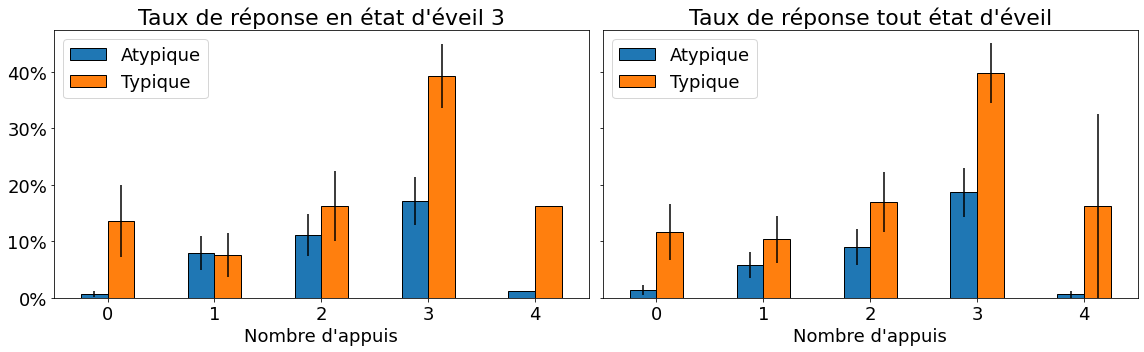

In [12]:
df = aggregate(videos3, analysis.responses_per_supports)
df = df.iloc[:, [0, 1, 2, 3, 6, 7, 4, 5, 8, 9]]

fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)
plot.per_semester(df, rot=0, axes=axes[0])

df2 = c.aggregate(analysis.responses_per_supports)
df2 = df2.iloc[:2, [0, 1, 6, 7, 2, 3, 4, 5, 8, 9]]

plot.per_semester(df2, rot=0, axes=axes[1])
axes[0].set_title('Taux de réponse en état d\'éveil 3', fontsize=22)
axes[0].set_xlabel('Nombre d\'appuis', fontsize=18)
axes[1].set_title('Taux de réponse tout état d\'éveil', fontsize=22)
axes[1].set_xlabel('Nombre d\'appuis', fontsize=18)
pd.concat([df, df2], axis=0)
plt.tight_layout()
plot.new_legend(axes)